#### Import Packages

In [2]:
import pandas as pd
import numpy as np

#### Read Initial Dataset

In [3]:
ue_data = pd.read_csv("amari_ue_data_merged_with_attack_number.csv")

In [4]:
ue_data

,_time,imeisv,5g_tmsi,amf_ue_id,bearer_0_apn,bearer_0_dl_total_bytes,bearer_0_ip,bearer_0_ipv6,bearer_0_pdu_session_id,bearer_0_qos_flow_id,...,pusch_snr,ri,turbo_decoder_avg,turbo_decoder_max,turbo_decoder_min,ul_tx,cell_id,attack,malicious,attack_number
0,2024-08-17 12:00:01.700,3557821101183501,379786680,106,ims,4832474,192.168.4.6,2001:468:3000:2::,1,1,...,43.0,2.0,2.000,2.0,2.0,10.0,1.0,0,1,0
1,2024-08-17 12:00:01.700,8642840401624200,2380574316,436,ims,4821610,192.168.4.2,2001:468:3000:1::,1,1,...,23.1,2.0,2.571,5.0,1.0,10.0,1.0,0,1,0
2,2024-08-17 12:00:01.700,8642840401594200,1855572917,109,ims,4775173,192.168.4.14,2001:468:3000:4::,1,1,...,8.2,2.0,2.929,5.0,1.0,10.0,3.0,0,1,0
3,2024-08-17 12:00:01.700,8609960480859058,3832369782,108,ims,4767199,192.168.4.10,2001:468:3000:3::,15,1,...,24.6,2.0,2.640,5.0,1.0,1719.0,3.0,0,0,0
4,2024-08-17 12:00:01.700,8609960468879057,1034619961,468,internet,469463419,10.20.10.20,NaN,8,1,...,31.0,1.0,2.093,5.0,1.0,2037.0,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686021,2024-08-22 06:59:55.404,8609960468879057,3286824466,114,internet,28496080215,10.20.10.20,NaN,11,1,...,34.3,2.0,2.227,3.0,2.0,22.0,1.0,0,0,0
686022,2024-08-22 06:59:58.267,8628490433231158,2521770320,107,ims,6926467,192.168.4.10,2001:468:3000:3::,10,1,...,9.2,1.0,1.987,5.0,1.0,269.0,2.0,0,0,0
686023,2024-08-22 06:59:58.267,8642840401612300,2518899335,230,ims,6984662,192.168.4.2,2001:468:3000:1::,1,1,...,21.3,1.0,2.753,5.0,1.0,275.0,2.0,0,1,0
686024,2024-08-22 06:59:58.267,8609960480666910,3415374190,106,ims,6936419,192.168.4.6,2001:468:3000:2::,5,1,...,34.2,1.0,2.585,5.0,1.0,284.0,2.0,0,0,0


In [20]:
# Count the number of NaN values in each column
nan_counts = ue_data.isna().sum()

print("NaN values in each column:")
print(nan_counts)


NaN values in each column:
_time                        740
imeisv                         0
bearer_0_dl_total_bytes        0
bearer_0_pdu_session_id        0
bearer_0_ul_total_bytes        0
bearer_1_dl_total_bytes    76268
bearer_1_pdu_session_id    76268
bearer_1_ul_total_bytes    76268
dl_bitrate                     0
rnti                           0
ul_bitrate                     0
ul_retx                        0
ul_err                         0
ul_mcs                       114
ul_path_loss                   1
ul_phr                         1
dl_err                         0
dl_mcs                        72
dl_retx                        0
dl_tx                          0
cqi                            0
epre                           0
p_ue                           1
pusch_snr                      0
turbo_decoder_avg            115
ul_tx                          0
cell_id                        0
attack                         0
malicious                      0
attack_number   

#### Drop Initial Features that are not considered useful

In [5]:
# Group by bearer_0_pdu_session_id and count unique imeisv values for each group
association_check = ue_data.groupby('bearer_0_pdu_session_id')['imeisv'].nunique()

# Filter to find cases where a bearer_0_pdu_session_id is associated with more than one imeisv
multiple_imeisv = association_check[association_check > 1]

# Display the results
print("bearer_0_pdu_session_id values associated with multiple imeisv values:")
print(multiple_imeisv)


bearer_0_pdu_session_id values associated with multiple imeisv values:
bearer_0_pdu_session_id
1     5
5     2
10    2
Name: imeisv, dtype: int64


In [6]:
# print the number of unique values for each feature
for column in ue_data.columns:
    unique_count = ue_data[column].nunique()
    print(f"Feature '{column}' has {unique_count} unique values.")

Feature '_time' has 152779 unique values.
Feature 'imeisv' has 9 unique values.
Feature '5g_tmsi' has 26 unique values.
Feature 'amf_ue_id' has 192 unique values.
Feature 'bearer_0_apn' has 2 unique values.
Feature 'bearer_0_dl_total_bytes' has 163450 unique values.
Feature 'bearer_0_ip' has 12 unique values.
Feature 'bearer_0_ipv6' has 8 unique values.
Feature 'bearer_0_pdu_session_id' has 8 unique values.
Feature 'bearer_0_qos_flow_id' has 1 unique values.
Feature 'bearer_0_sst' has 1 unique values.
Feature 'bearer_0_ul_total_bytes' has 163415 unique values.
Feature 'bearer_1_apn' has 2 unique values.
Feature 'bearer_1_dl_total_bytes' has 522794 unique values.
Feature 'bearer_1_ip' has 13 unique values.
Feature 'bearer_1_pdu_session_id' has 6 unique values.
Feature 'bearer_1_qos_flow_id' has 1 unique values.
Feature 'bearer_1_sst' has 1 unique values.
Feature 'bearer_1_ul_total_bytes' has 533495 unique values.
Feature 'dl_bitrate' has 173499 unique values.
Feature 'ran_id' has 2 uniq

In [7]:
# drop columns
columns_to_drop = ['5g_tmsi', 'amf_ue_id', 'bearer_0_apn','bearer_0_ip','bearer_0_ipv6','bearer_0_qos_flow_id',
                   'bearer_0_sst','bearer_1_apn','bearer_1_ip','bearer_1_qos_flow_id','bearer_1_sst','ran_id','ran_plmn',
                   'registered','t3512','tac','tac_plmn','ue_aggregate_max_bitrate_dl','ue_aggregate_max_bitrate_ul',
                   'bearer_1_ipv6','cell','ul_n_layer','ul_rank','initial_ta','turbo_decoder_max','turbo_decoder_min',
                  'ri','ran_ue_id']  

ue_data = ue_data.drop(columns=columns_to_drop)

#### Create one dataframe per UE

In [8]:
# Get a list of unique user identifiers based on 'imeisv'
unique_imeisvs = ue_data['imeisv'].unique()
print(unique_imeisvs)

[3557821101183501 8642840401624200 8642840401594200 8609960480859058
 8609960468879057 8677660403123800 8628490433231158 8642840401612300
 8609960480666910]


In [9]:
# Create a dictionary to store each user dataframe separately
user_dataframes = {}

# Loop through each unique imeisv and create a separate dataframe for each user
for imeisv in unique_imeisvs:
    user_dataframes[imeisv] = ue_data[ue_data['imeisv'] == imeisv]

In [10]:
# 1st UE: 3557821101183501
ue_1 = user_dataframes[3557821101183501]

In [11]:
print(ue_1.reset_index())

        index                    _time            imeisv  \
0           0  2024-08-17 12:00:01.700  3557821101183501   
1          12  2024-08-17 12:00:06.845  3557821101183501   
2          23  2024-08-17 12:00:11.997  3557821101183501   
3          30  2024-08-17 12:00:17.156  3557821101183501   
4          38  2024-08-17 12:00:22.299  3557821101183501   
...       ...                      ...               ...   
76208  685982  2024-08-22 06:59:34.786  3557821101183501   
76209  685990  2024-08-22 06:59:39.931  3557821101183501   
76210  685999  2024-08-22 06:59:45.077  3557821101183501   
76211  686010  2024-08-22 06:59:50.242  3557821101183501   
76212  686017  2024-08-22 06:59:55.404  3557821101183501   

       bearer_0_dl_total_bytes  bearer_0_pdu_session_id  \
0                      4832474                        1   
1                      4832474                        1   
2                      4832474                        1   
3                      4832474             

#### Basic classifier training to see what a first performance is

In [12]:
dataset = ue_data.drop(columns=['_time','imeisv','malicious','attack_number','cell_id','bearer_0_pdu_session_id','bearer_1_pdu_session_id'])

In [13]:
dataset

,bearer_0_dl_total_bytes,bearer_0_ul_total_bytes,bearer_1_dl_total_bytes,bearer_1_ul_total_bytes,dl_bitrate,rnti,ul_bitrate,ul_retx,ul_err,ul_mcs,...,dl_mcs,dl_retx,dl_tx,cqi,epre,p_ue,pusch_snr,turbo_decoder_avg,ul_tx,attack
0,4832474,681308,4.673102e+06,4.660701e+06,5484.0,18060,2257.0,0.0,0.0,27.0,...,19.4,1.0,20.0,13.0,-88.7,-12.0,43.0,2.000,10.0,0
1,4821610,670248,5.930564e+06,4.496936e+09,2251.0,17989,2786.0,4.0,0.0,16.5,...,7.2,1.0,17.0,7.0,-113.2,-17.0,23.1,2.571,10.0,0
2,4775173,662867,4.153920e+05,4.338450e+05,3413.0,17994,2182.0,4.0,0.0,4.3,...,12.9,7.0,19.0,10.0,-106.6,-15.0,8.2,2.929,10.0,0
3,4767199,324765,8.089491e+08,3.640957e+09,3318552.0,17929,10415466.0,155.0,0.0,17.7,...,19.5,166.0,1826.0,12.0,-91.6,16.0,24.6,2.640,1719.0,0
4,469463419,2988597133,NaN,NaN,3357942.0,18063,19980011.0,3.0,0.0,27.0,...,26.8,5.0,2361.0,15.0,-103.1,-1.0,31.0,2.093,2037.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686021,28496080215,160059154372,NaN,NaN,6378.0,17926,4943.0,0.0,0.0,27.0,...,15.2,2.0,30.0,10.0,-89.5,-19.0,34.3,2.227,22.0,0
686022,6926467,545105,2.799739e+10,9.676340e+10,5799.0,18221,59111.0,32.0,0.0,4.2,...,26.9,0.0,27.0,15.0,-114.0,-18.0,9.2,1.987,269.0,0
686023,6984662,1046126,8.805720e+06,3.443623e+08,3733.0,18260,79075.0,25.0,0.0,17.5,...,27.0,0.0,18.0,14.0,-102.9,-22.0,21.3,2.753,275.0,0
686024,6936419,538981,2.898059e+10,2.418389e+11,4224.0,18220,64049.0,29.0,0.0,26.9,...,25.9,3.0,21.0,15.0,-89.9,-11.0,34.2,2.585,284.0,0


In [14]:
dataset.columns

Index(['bearer_0_dl_total_bytes', 'bearer_0_ul_total_bytes',
       'bearer_1_dl_total_bytes', 'bearer_1_ul_total_bytes', 'dl_bitrate',
       'rnti', 'ul_bitrate', 'ul_retx', 'ul_err', 'ul_mcs', 'ul_path_loss',
       'ul_phr', 'dl_err', 'dl_mcs', 'dl_retx', 'dl_tx', 'cqi', 'epre', 'p_ue',
       'pusch_snr', 'turbo_decoder_avg', 'ul_tx', 'attack'],
      dtype='object')

Accuracy: 0.9996574493826801
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    128831
           1       1.00      1.00      1.00      8375

    accuracy                           1.00    137206
   macro avg       1.00      1.00      1.00    137206
weighted avg       1.00      1.00      1.00    137206



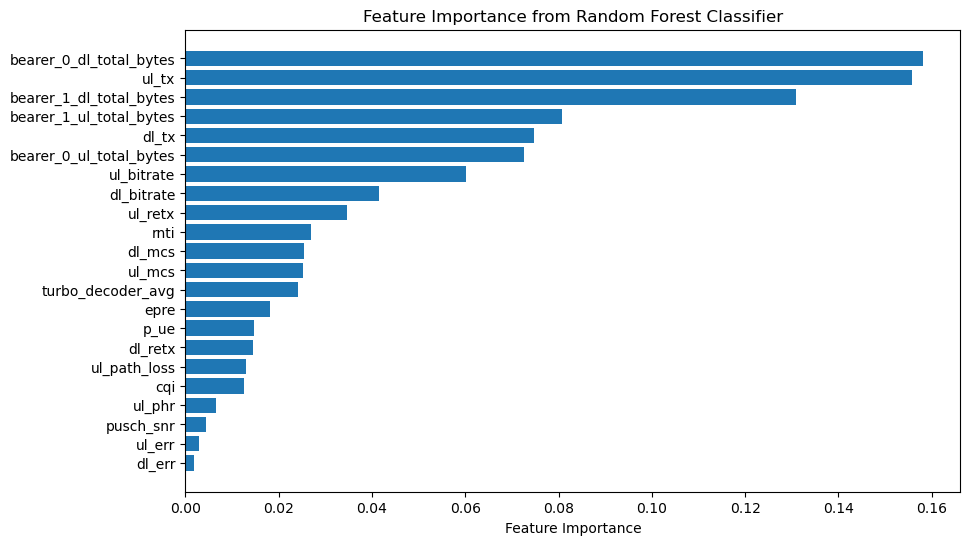

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Assuming 'dataset' is your dataframe and 'attack' is the target column
X = dataset.drop(columns=['attack'])  
y = dataset['attack']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Feature Importance
feature_importances = clf.feature_importances_
features = X.columns

# Create a DataFrame for better visualization of feature importance
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.title("Feature Importance from Random Forest Classifier")
plt.gca().invert_yaxis()  # To display the most important features on top
plt.show()


In [16]:
# print NaN and Inf values per feature

for column in dataset.columns:
    nan_count = dataset[column].isna().sum()
    inf_count = np.isinf(dataset[column]).sum()
    print(f"Feature '{column}': NaN Count = {nan_count}, Infinite Count = {inf_count}")


Feature 'bearer_0_dl_total_bytes': NaN Count = 0, Infinite Count = 0
Feature 'bearer_0_ul_total_bytes': NaN Count = 0, Infinite Count = 0
Feature 'bearer_1_dl_total_bytes': NaN Count = 76268, Infinite Count = 0
Feature 'bearer_1_ul_total_bytes': NaN Count = 76268, Infinite Count = 0
Feature 'dl_bitrate': NaN Count = 0, Infinite Count = 0
Feature 'rnti': NaN Count = 0, Infinite Count = 0
Feature 'ul_bitrate': NaN Count = 0, Infinite Count = 0
Feature 'ul_retx': NaN Count = 0, Infinite Count = 0
Feature 'ul_err': NaN Count = 0, Infinite Count = 0
Feature 'ul_mcs': NaN Count = 114, Infinite Count = 0
Feature 'ul_path_loss': NaN Count = 1, Infinite Count = 0
Feature 'ul_phr': NaN Count = 1, Infinite Count = 0
Feature 'dl_err': NaN Count = 0, Infinite Count = 0
Feature 'dl_mcs': NaN Count = 72, Infinite Count = 0
Feature 'dl_retx': NaN Count = 0, Infinite Count = 0
Feature 'dl_tx': NaN Count = 0, Infinite Count = 0
Feature 'cqi': NaN Count = 0, Infinite Count = 0
Feature 'epre': NaN Count =

#### Save dataset for per UE analysis

In [17]:
dataset = ue_data.drop(columns=['cell_id','bearer_0_pdu_session_id','bearer_1_pdu_session_id','rnti'])

In [18]:
# Count the number of NaN values in each column
nan_counts = dataset.isna().sum()

print("NaN values in each column:")
print(nan_counts)


NaN values in each column:
_time                        740
imeisv                         0
bearer_0_dl_total_bytes        0
bearer_0_ul_total_bytes        0
bearer_1_dl_total_bytes    76268
bearer_1_ul_total_bytes    76268
dl_bitrate                     0
ul_bitrate                     0
ul_retx                        0
ul_err                         0
ul_mcs                       114
ul_path_loss                   1
ul_phr                         1
dl_err                         0
dl_mcs                        72
dl_retx                        0
dl_tx                          0
cqi                            0
epre                           0
p_ue                           1
pusch_snr                      0
turbo_decoder_avg            115
ul_tx                          0
attack                         0
malicious                      0
attack_number                  0
dtype: int64


In [19]:
dataset.to_csv('ue_dataset_01.csv',index=False)